In [37]:
# Code for transient 1D convection. 

%matplotlib notebook
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Define problem parameter:
c = 2 # Wave speed

# Define gird params:
nx = 71; xmin = 0.; xmax = 10.
x = numpy.linspace(xmin,xmax,nx);
dx = (xmax-xmin)/(nx-1);
u0 = numpy.zeros(nx);

#Define time parameters:
dt = 0.010;
Tstart = 0.0; Tend = 5.0
Ntime = int((Tend-Tstart)/dt);

sigma = c*dt/dx;

print(sigma)

# Define initial conditions
for i in range (nx):
    if (x[i] >= 2.0 and x[i] < 4.0):
        u0[i] = 0.5*(1.0 - numpy.cos(2.0*numpy.pi*(x[i]-2.)/2.0));
    #    u0[i] = 1;
    
    #u0[i] = numpy.sin(2*3*numpy.pi*x[i]/10);

0.14


<IPython.core.display.Javascript object>


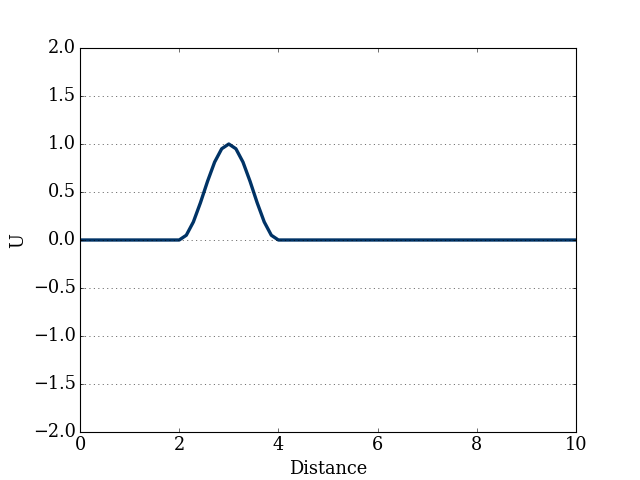

In [46]:
pyplot.figure();
ax = pyplot.axes(xlim=(0,10),ylim=(-2,2),xlabel=('Distance'),ylabel=('U'));
ax.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0], minor=True)
ax.yaxis.grid(True, which='minor')
pyplot.plot(x, u0, color='#003366', ls='-', lw=3)
pyplot.ylim(-2,2);

In [39]:
time = Tstart;

# Using RK2 time, backward space (1st Order in space and 2nd order in time)
uFD  = numpy.copy(u0);
unew = numpy.copy(u0);
usr  = numpy.copy(u0);

uFDP = numpy.zeros((Ntime,nx));

for iter in range (Ntime):      
    usr[1:] = uFD[1:] - 0.5*dt*c*(uFD[1:]-uFD[:-1])/dx;
    usr[0] = usr[-1];
    unew[1:] = uFD[1:] - dt*c*(usr[1:]-usr[:-1])/dx;
    
    unew[0] = unew[-1];
    
    uFD = numpy.copy(unew);
    uFDP[iter][:] = numpy.copy(unew);
    time = time + dt;

<IPython.core.display.Javascript object>


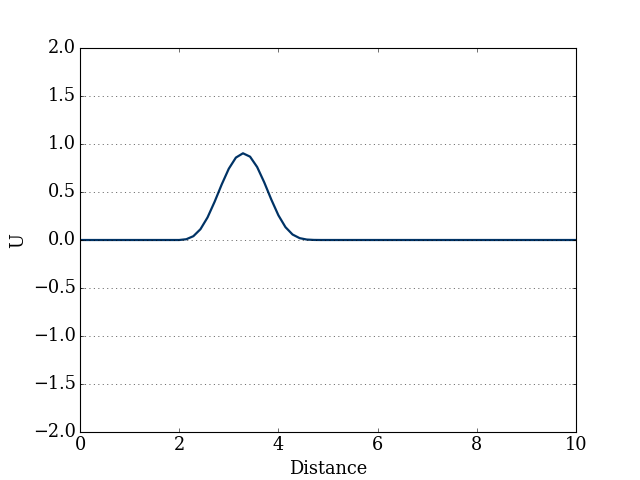

In [27]:
from matplotlib import animation
#from JSAnimation.IPython_display import display_animation

def animate(data):
    x = numpy.linspace(0,10,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,10),ylim=(-2,2),xlabel=('Distance'),ylabel=('U'));
ax.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0], minor=True)
ax.yaxis.grid(True, which='minor')
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=uFDP, interval=20)

<IPython.core.display.Javascript object>


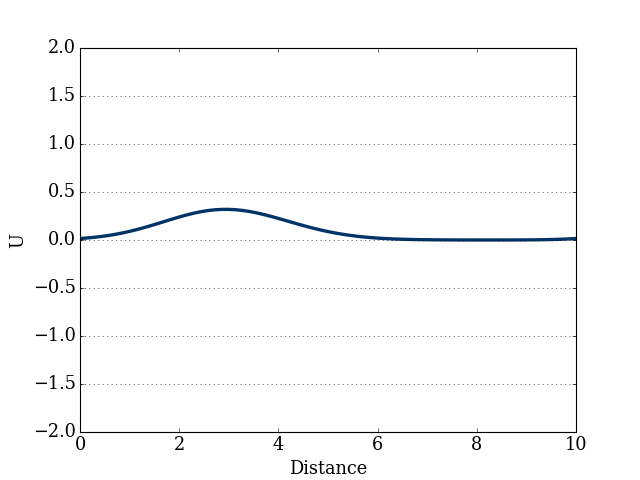

In [44]:
pyplot.figure();
ax = pyplot.axes(xlim=(0,10),ylim=(-2,2),xlabel=('Distance'),ylabel=('U'));
ax.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0], minor=True)
ax.yaxis.grid(True, which='minor')
pyplot.plot(x, uFD, color='#003366', ls='-', lw=3)
pyplot.ylim(-2,2);


In [48]:
1-max(uFD)

0.68095748994814864